In [1]:
import numpy as np
import pandas as pd
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df_mini = pd.read_csv('../datos/datos_bo3_minimapa.csv')
df_pov = pd.read_csv('../datos/datos_bo3_pov.csv')

In [3]:
df_mini.head()

,mini_01,mini_02,mini_03,mini_04,mini_05,mouse_final
0,datos/mini_mapa/mini_mapa_13-14-31-51.jpg,datos/mini_mapa/mini_mapa_13-14-31-51.jpg,datos/mini_mapa/mini_mapa_13-14-31-51.jpg,datos/mini_mapa/mini_mapa_13-14-31-52.jpg,datos/mini_mapa/mini_mapa_13-14-31-52.jpg,"[953, 540]"
1,datos/mini_mapa/mini_mapa_13-14-31-52.jpg,datos/mini_mapa/mini_mapa_13-14-31-52.jpg,datos/mini_mapa/mini_mapa_13-14-31-52.jpg,datos/mini_mapa/mini_mapa_13-14-31-52.jpg,datos/mini_mapa/mini_mapa_13-14-31-52.jpg,"[961, 540]"
2,datos/mini_mapa/mini_mapa_13-14-31-53.jpg,datos/mini_mapa/mini_mapa_13-14-31-53.jpg,datos/mini_mapa/mini_mapa_13-14-31-53.jpg,datos/mini_mapa/mini_mapa_13-14-31-53.jpg,datos/mini_mapa/mini_mapa_13-14-31-53.jpg,"[960, 540]"
3,datos/mini_mapa/mini_mapa_13-14-31-53.jpg,datos/mini_mapa/mini_mapa_13-14-31-53.jpg,datos/mini_mapa/mini_mapa_13-14-31-53.jpg,datos/mini_mapa/mini_mapa_13-14-31-53.jpg,datos/mini_mapa/mini_mapa_13-14-31-54.jpg,"[960, 540]"
4,datos/mini_mapa/mini_mapa_13-14-31-54.jpg,datos/mini_mapa/mini_mapa_13-14-31-54.jpg,datos/mini_mapa/mini_mapa_13-14-31-54.jpg,datos/mini_mapa/mini_mapa_13-14-31-54.jpg,datos/mini_mapa/mini_mapa_13-14-31-54.jpg,"[957, 540]"


In [4]:
print(df_mini.shape)
print(df_pov.shape)

(220, 6)
(220, 6)


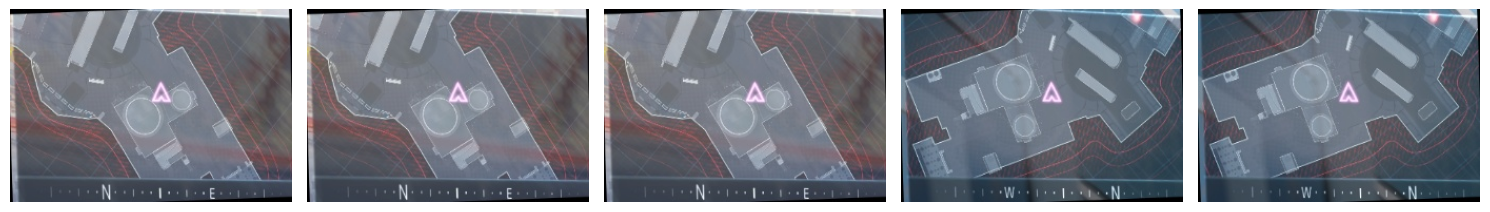

In [5]:
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i in range(0,5):
    primera_fila = df_mini.iloc[0]
    imagen = Image.open("../" +str(primera_fila.iloc[i]))
    matriz_np = np.array(imagen)  

    axes[i].imshow(matriz_np)
    axes[i].axis('off')

plt.tight_layout()
plt.show()  

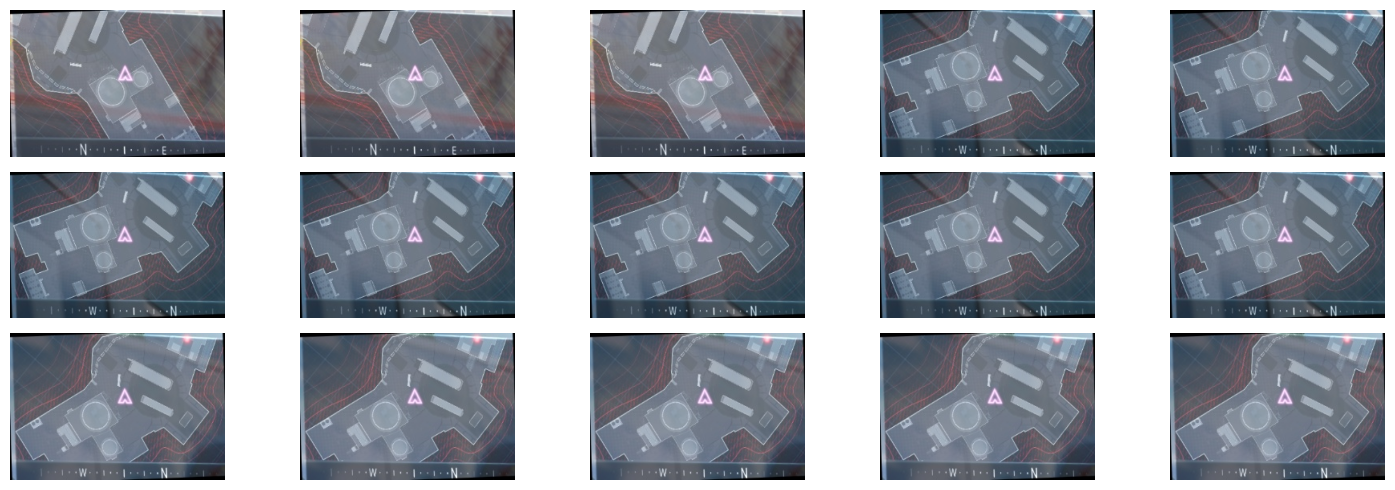

In [6]:
fig, axes = plt.subplots(3, 5, figsize=(15, 5))

for i in range(3): 
    for j in range(5):
        # Obtener la ruta de la imagen
        ruta_imagen = df_mini.iloc[i, j]  # Elimina los corchetes
        
        # Abrir la imagen y convertirla a matriz numpy
        imagen = Image.open("../" + ruta_imagen)
        matriz_np = np.array(imagen)
        
        # Mostrar la imagen en el subplot correspondiente
        axes[i, j].imshow(matriz_np)
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()

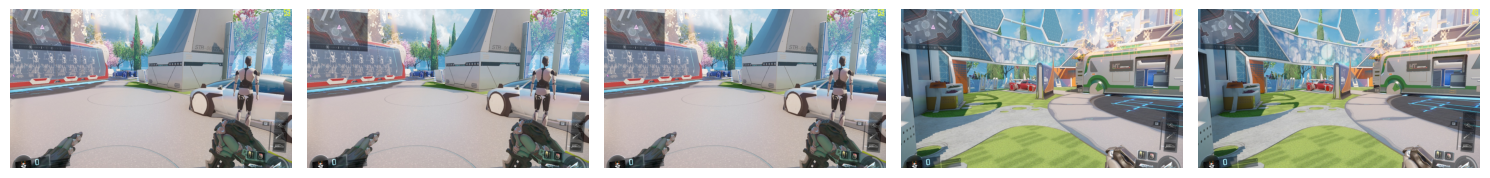

In [7]:
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i in range(0,5):
    primera_fila = df_pov.iloc[0]
    imagen = Image.open("../" +str(primera_fila.iloc[i]))
    matriz_np = np.array(imagen)  

    axes[i].imshow(matriz_np)
    axes[i].axis('off')

plt.tight_layout()
plt.show()  

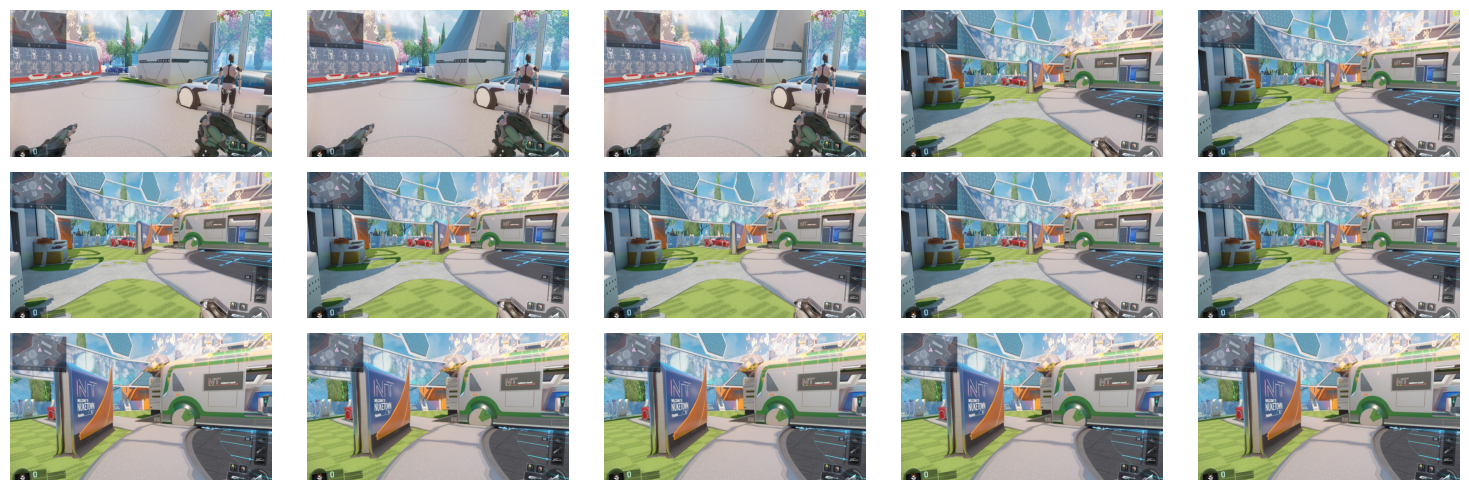

In [8]:
fig, axes = plt.subplots(3, 5, figsize=(15, 5))

for i in range(3): 
    for j in range(5):
        # Obtener la ruta de la imagen
        ruta_imagen = df_pov.iloc[i, j]  # Elimina los corchetes
        
        # Abrir la imagen y convertirla a matriz numpy
        imagen = Image.open("../" + ruta_imagen)
        matriz_np = np.array(imagen)
        
        # Mostrar la imagen en el subplot correspondiente
        axes[i, j].imshow(matriz_np)
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()

Tamaño imagen -> (268, 183)
Tamaño matriz -> (183, 268, 3)


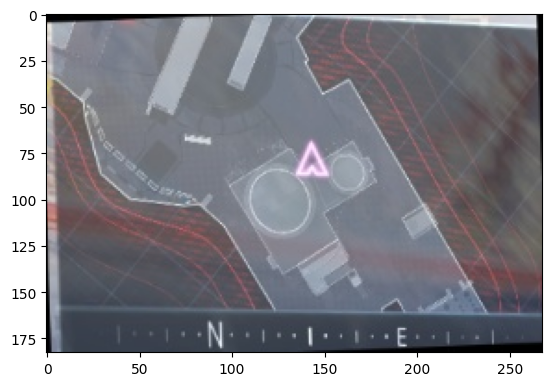

In [9]:
primera_fila = df_mini.iloc[0]
imagen = Image.open("../" +str(primera_fila.iloc[1]))
matriz_np = np.array(imagen)  
print("Tamaño imagen -> "+str(imagen.size))
print("Tamaño matriz -> "+ str(matriz_np.shape))
plt.imshow(matriz_np)
plt.axis('on')
plt.show()

Tamaño imagen -> (1280, 720)
Tamaño matriz -> (720, 1280, 3)


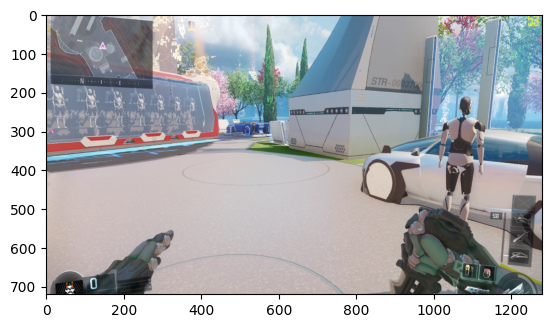

In [10]:
primera_fila = df_pov.iloc[0]
imagen = Image.open("../" +str(primera_fila.iloc[1]))
matriz_np = np.array(imagen)  
print("Tamaño imagen -> "+str(imagen.size))
print("Tamaño matriz -> "+ str(matriz_np.shape))
plt.imshow(matriz_np)
plt.axis('on') 
plt.show()

In [11]:
def comprobar_contenido(X_train , Y_train , num_video):

    fig, axs = plt.subplots(1, 5, figsize=(5 * 2, 1 * 2))

    for i in range(5):
        axs[i].imshow(X_train[num_video][i])
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()
    print("Etiqueta -> "+ str(Y_train[num_video]))

# CREACION BATCH_DISTRIBUTION

#### Dado que mi equipo no es lo suficientemente potente como para cargar todas las imgenes en la RAM
#### Procedo a crear una clase que distribuya mi Dataset en pequeños trozos conocidos como BATCHES

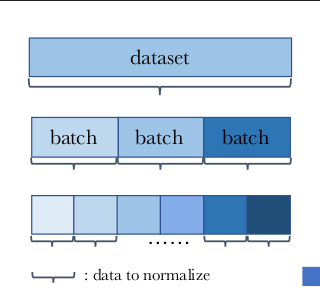

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Model ,Sequential
from tensorflow.keras.layers import Input, TimeDistributed, MaxPooling2D, Flatten, Dense ,ConvLSTM2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils import Sequence

In [13]:
class ImageDataGenerator(Sequence):
    def __init__(self, df , sequence_length ,image_height , image_width , batch_size=32, **kwargs):
        self.df = df
        self.image_sequence_length = sequence_length
        self.image_height = image_height
        self.image_width = image_width
        self.batch_size = batch_size
        super().__init__(**kwargs)  # Llamada al constructor de la clase base
        
    def __len__(self):
        return int(np.ceil(len(self.df) / float(self.batch_size)))
    
    def __getitem__(self, index):
        inicio_lote = index * self.batch_size
        final_lote = (index + 1) * self.batch_size
        
        batch_df = self.df.iloc[inicio_lote:final_lote]     #Obtenemos un lote del df
        
        X_batch = np.zeros((len(batch_df), self.image_sequence_length ,self.image_height, self.image_width, 3))  # Inicializar matriz para las imágenes
        y_batch = np.array([eval(mouse_final) for mouse_final in batch_df['mouse_final']])          #Almacenamos todas las label del df que corresponden al batch
        
        for i, (_, row) in enumerate(batch_df.iterrows()):
            frames = []
            for j in range(self.image_sequence_length):
                imagen = Image.open("../" + row.iloc[j])    # Obtener la ruta de la imagen
                imagen = np.array(imagen) / 255.0           # Normalizar la imagen

                frames.append(imagen)                  #Juntamos frames en lista
            video = np.stack(frames, axis=0)           # Convertir lista de frames en un video np
            X_batch[i] = video
        
        return X_batch, y_batch

In [14]:
df_mini.shape

(220, 6)

In [15]:
# Crear generadores de Batches
train_generator = ImageDataGenerator(df_mini, sequence_length=5 ,image_height=183 , image_width=268, batch_size=32)

In [16]:
#Cantidad de batches en los que se divide el df
train_generator.__len__()

7

In [17]:
# Obtenemos el batch numero (1)
X_batch, y_batch = train_generator.__getitem__(1)

In [18]:
X_batch.shape

(32, 5, 183, 268, 3)

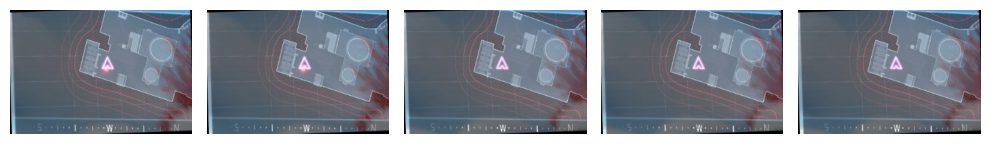

Etiqueta -> [1015  550]


In [19]:
# Comprobamos si el batch produce correctamente las imagenes y las labels
# Seleccionamos ver la posicion numero 40 del batch creado
comprobar_contenido(X_batch , y_batch,0)

In [20]:
y_batch

array([[1015,  550],
       [1015,  550],
       [1015,  550],
       [1015,  550],
       [1015,  550],
       [1015,  550],
       [ 990,  540],
       [ 950,  537],
       [ 950,  537],
       [ 956,  541],
       [ 961,  540],
       [ 789,  533],
       [ 962,  540],
       [1254,  540],
       [1254,  540],
       [ 950,  540],
       [ 936,  540],
       [ 934,  540],
       [ 959,  540],
       [1042,  540],
       [1006,  540],
       [ 959,  542],
       [ 926,  546],
       [ 960,  540],
       [ 959,  540],
       [ 958,  540],
       [1112,  491],
       [ 970,  534],
       [1010,  545],
       [ 746,  509],
       [ 960,  540],
       [ 957,  540]])

In [21]:
type(y_batch[0][0])

numpy.int32

# CREACION MODELO LSTM_CNN

<div style="text-align:center;">
    <iframe width="360" height="240" src="https://www.youtube.com/embed/deVW91RR_lQ" title="Deep Learning - 05 17 CNN LSTM" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>
</div>

https://www.kaggle.com/code/alextrinity/multi-head-cnn-bigru-cross-attention

In [22]:
def creacion_modelo_convLSTM(input_shape):
    
    model = Sequential()
    model.add(Input(shape=input_shape))
    
    # Capa ConvLSTM_01
    model.add(ConvLSTM2D(filters= 128, kernel_size=(4, 4), 
                                    activation='relu', 
                                    padding='same',
                                    return_sequences=True))
    model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
    model.add(TimeDistributed(BatchNormalization()))

    # Capa ConvLSTM_02
    model.add(ConvLSTM2D(filters= 64, kernel_size=(8, 8), 
                                    activation='relu', 
                                    padding='same', 
                                    return_sequences=True))
    model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
    model.add(TimeDistributed(BatchNormalization()))

    # Capa Final
    model.add(ConvLSTM2D(filters=5, kernel_size=(8, 8), 
                                    activation='relu', 
                                    padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(2))     #Regresion

    return model

# PREPARACIÒN ENTRENAMIENTO

In [23]:
# Modelo Mini-Mapa
df_train_mini, df_test_mini = train_test_split(df_mini, test_size=0.2, random_state=42)
df_train_mini, df_valid_mini = train_test_split(df_train_mini, test_size=0.25, random_state=42)

print("Tamaño total: ",len(df_mini))
print("Tamaño del conjunto de entrenamiento:", len(df_train_mini))
print("Tamaño del conjunto de validación:", len(df_valid_mini))
print("Tamaño del conjunto de prueba:", len(df_test_mini))

Tamaño total:  220
Tamaño del conjunto de entrenamiento: 132
Tamaño del conjunto de validación: 44
Tamaño del conjunto de prueba: 44


In [18]:
# Modelo Pov
df_train_pov, df_test_pov = train_test_split(df_pov, test_size=0.2, random_state=42)
df_train_pov, df_valid_pov = train_test_split(df_train_pov, test_size=0.25, random_state=42)

print("Tamaño total: ",len(df_pov))
print("Tamaño del conjunto de entrenamiento:", len(df_train_pov))
print("Tamaño del conjunto de validación:", len(df_valid_pov))
print("Tamaño del conjunto de prueba:", len(df_test_pov))

Tamaño total:  220
Tamaño del conjunto de entrenamiento: 132
Tamaño del conjunto de validación: 44
Tamaño del conjunto de prueba: 44


In [24]:
batch_size = 10

In [25]:
# Generadores de Batches Mini-Mapa
train_generator_mapa = ImageDataGenerator(df_train_mini, sequence_length=5, image_height=183, image_width=268, batch_size=batch_size)
valid_generator_mapa = ImageDataGenerator(df_valid_mini, sequence_length=5, image_height=183, image_width=268, batch_size=batch_size)

In [20]:
# Generadores de Batches POV
train_generator_pov = ImageDataGenerator(df_train_pov, sequence_length=5, image_height=720, image_width=1280, batch_size=batch_size)
valid_generator_pov = ImageDataGenerator(df_valid_pov, sequence_length=5, image_height=720, image_width=1280, batch_size=batch_size)

In [26]:
# Modelo Mini-Mapa
timesteps = 5
height = 183
width = 268
channels = 3
input_shape = (timesteps, height, width, channels)

model_mini_mapa = creacion_modelo_convLSTM(input_shape)
model_mini_mapa.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

In [27]:
model_mini_mapa.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv_lstm2d (ConvLSTM2D)        │ (None, 5, 183, 268,    │     1,073,664 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 5, 91, 134,     │             0 │
│ (TimeDistributed)               │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 5, 91, 134,     │           512 │
│ (TimeDistributed)               │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm2d_1 (ConvLSTM2D)      │ (None, 5, 91, 134, 64) │     3,145,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ (None, 5, 45, 67, 64)  │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_3              │ (None, 5, 45, 67, 64)  │           256 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm2d_2 (ConvLSTM2D)      │ (None, 45, 67, 5)      │        88,340 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 33, 5)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3630)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │         7,262 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,316,018 (16.46 MB)

 Trainable params: 4,315,634 (16.46 MB)

 Non-trainable params: 384 (1.50 KB)

In [28]:
# Entrenamiento Mini-Mapa
history = model_mini_mapa.fit(train_generator_mapa, epochs=1000, validation_data=valid_generator_mapa, callbacks=[early_stopping])

Epoch 1/1000
